In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [119]:
import warnings
warnings.filterwarnings('ignore')

# Final Project: NBA Quick Stats

In [120]:
team_name_map = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "NJN",
    "Charlotte Bobcats": "CHA",
    "Charlotte Hornets": "CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Hornets": "NOH",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

In [121]:
def team_specific_data(team, year):
    if team.startswith("Chicago Bulls"):
        print(f"Working on {year} {team}")
    
    if team.endswith('*'):
        team = team[:-1]
    
    team_abbrev = team_name_map[team]
    url = f"https://www.basketball-reference.com/teams/{team_abbrev}/{year}.html"
    table = pd.read_html(url, match='PER')[0]
    table['min_per_game'] = table['MP'] / table['G']
    table = table[table['min_per_game'] >= 15]
    
    per_list = list(table['PER'].sort_values(ascending=False))
    top_per_list = per_list[:3]
    age_list = list(table['Age'])

    best_per = per_list[0]
    top_per_avg = sum(top_per_list) / len(top_per_list)
    avg_age = sum(age_list) / len(age_list)
    
    return pd.Series([best_per, round(top_per_avg, 2), round(avg_age, 2)])

In [122]:
def compute_summary_stats(year):
    url = f"https://www.basketball-reference.com/leagues/NBA_{year}.html"
    tables = pd.read_html(url)
    
    east = tables[0].iloc[:,[0, 3]]
    east.rename(columns={'Eastern Conference': 'Team'}, inplace=True)
    east['Region'] = 'East'
    
    west = tables[1].iloc[:,[0, 3]]
    west.rename(columns={'Western Conference': 'Team'}, inplace=True)
    west['Region'] = 'West'
    
    all_teams = [east, west]
    all_teams = pd.concat(all_teams)
    all_teams = all_teams.reset_index()
    all_teams.drop('index', axis=1, inplace=True)
    
    if year >= 2016:
        df_total = tables[4].sort_values('PTS')
        df_total = df_total.merge(all_teams).sort_values('W/L%')
        df_total['Year'] = year
        df_total['3P_Rate'] = df_total['3PA'] / df_total['FGA']
        df_total['W/L%'] = pd.to_numeric(df_total['W/L%'])
        df_total['TopTeamThisYear?'] = (df_total['W/L%'] >= df_total['W/L%'].quantile(0.75))
        return pd.DataFrame(df_total.sort_values('W/L%', ascending=False))
    else:
        df_total = tables[2].sort_values('PTS')
        df_total = df_total.merge(all_teams).sort_values('W/L%')
        df_total['Year'] = year
        df_total['3P_Rate'] = df_total['3PA'] / df_total['FGA']
        df_total['W/L%'] = pd.to_numeric(df_total['W/L%'])
        df_total['TopTeamThisYear?'] = (df_total['W/L%'] >= df_total['W/L%'].quantile(0.75))
        return pd.DataFrame(df_total.sort_values('W/L%', ascending=False))

In [123]:
# nba_data = []

# for year in range(2012, 2022):
#     print(f"Working on year {year}")
#     nba_data.append(compute_summary_stats(year))
    
# nba_data = pd.concat(nba_data)
# nba_data

In [124]:
# nba_data[['best_per','top_per_avg', 'age']] = nba_data.apply(
#     lambda row : team_specific_data(row['Team'], row['Year']),
#     axis=1
# )

In [125]:
# new_file = '/Users/christopher_song/Desktop/fall_2021/stat_303_1/stat-303-1-project/data/nba_data.csv'
# nba_data.to_csv(new_file)

In [126]:
fp = '/Users/christopher_song/Desktop/fall_2021/stat_303_1/stat-303-1-project/data/nba_data.csv'
nba_data = pd.read_csv(fp)
nba_data.head()

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,PF,PTS,W/L%,Region,Year,3P_Rate,TopTeamThisYear?,best_per,top_per_avg,age
0,12,18.0,Chicago Bulls*,66,241.5,37.4,82.8,0.452,6.3,16.9,...,17.3,96.3,0.758,East,2012,0.204106,True,23.0,20.77,27.44
1,28,2.0,San Antonio Spurs*,66,241.5,39.6,82.8,0.478,8.4,21.3,...,17.3,103.7,0.758,West,2012,0.257246,True,24.1,22.87,28.00
2,27,3.0,Oklahoma City Thunder*,66,242.3,37.3,79.2,0.471,7.2,20.0,...,20.5,103.1,0.712,West,2012,0.252525,True,26.2,23.40,26.00
3,23,7.0,Miami Heat*,66,243.0,37.1,79.0,0.469,5.6,15.6,...,19.4,98.5,0.697,East,2012,0.197468,True,30.7,25.30,28.50
4,17,13.0,Indiana Pacers*,66,242.3,35.7,81.4,0.438,5.9,16.1,...,21.7,97.7,0.636,East,2012,0.197789,True,19.3,18.57,26.67


# Questions

1. How have the basic stats (ie. 3-point FGs attempted, winning percentage, etc.) of NBA teams changed over the past decade? **[Ryan]**

2. Playoff team data vs Non-playoff team data over past decade **[Chris]**

3. What variable has the highest correlation with winning percentage among teams in the top 25% over the past decade? Is there a significant difference with this variable between the top 25% and bottom 25%? **[Jovanni]**

# Part 2

## Playoff Team Data vs. Non-Playoff Team Data

In [127]:
nba_data['Year_Bin'] = pd.cut(nba_data['Year'], [2011.5, 2014.5, 2017.5, 2021.5], 
                              labels=['2012-2014', '2015-2017', '2018-2021'])

playoff_data = nba_data[nba_data['Team'].str.endswith('*')]
playoff_data['Status'] = 'Playoffs'

lottery_data = nba_data[~nba_data['Team'].str.endswith('*')]
lottery_data['Status'] = 'Lottery'

nba_data = pd.concat([playoff_data, lottery_data])

display(playoff_data.head())
display(lottery_data.head())

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,W/L%,Region,Year,3P_Rate,TopTeamThisYear?,best_per,top_per_avg,age,Year_Bin,Status
0,12,18.0,Chicago Bulls*,66,241.5,37.4,82.8,0.452,6.3,16.9,...,0.758,East,2012,0.204106,True,23.0,20.77,27.44,2012-2014,Playoffs
1,28,2.0,San Antonio Spurs*,66,241.5,39.6,82.8,0.478,8.4,21.3,...,0.758,West,2012,0.257246,True,24.1,22.87,28.00,2012-2014,Playoffs
2,27,3.0,Oklahoma City Thunder*,66,242.3,37.3,79.2,0.471,7.2,20.0,...,0.712,West,2012,0.252525,True,26.2,23.40,26.00,2012-2014,Playoffs
3,23,7.0,Miami Heat*,66,243.0,37.1,79.0,0.469,5.6,15.6,...,0.697,East,2012,0.197468,True,30.7,25.30,28.50,2012-2014,Playoffs
4,17,13.0,Indiana Pacers*,66,242.3,35.7,81.4,0.438,5.9,16.1,...,0.636,East,2012,0.197789,True,19.3,18.57,26.67,2012-2014,Playoffs


,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,W/L%,Region,Year,3P_Rate,TopTeamThisYear?,best_per,top_per_avg,age,Year_Bin,Status
16,21,9.0,Houston Rockets,66,243.4,37.7,84.0,0.449,7.2,20.2,...,0.515,West,2012,0.240476,False,19.6,18.80,26.73,2012-2014,Lottery
17,22,8.0,Phoenix Suns,66,240.0,37.8,82.5,0.458,6.7,19.6,...,0.500,West,2012,0.237576,False,21.2,18.97,29.62,2012-2014,Lottery
18,25,5.0,Milwaukee Bucks,66,240.4,37.9,85.6,0.443,6.6,19.2,...,0.470,East,2012,0.224299,False,20.5,19.23,27.17,2012-2014,Lottery
19,14,16.0,Portland Trail Blazers,66,241.9,36.4,82.1,0.443,7.2,20.9,...,0.424,West,2012,0.254568,False,22.7,20.07,28.55,2012-2014,Lottery
20,20,10.0,Minnesota Timberwolves,66,241.5,35.7,82.3,0.433,7.2,21.6,...,0.394,West,2012,0.262454,False,25.4,21.47,24.38,2012-2014,Lottery


In [140]:
focus_cols = ['age', 'best_per', 'top_per_avg', 'Team','FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'ORB', 'DRB',
            'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', '3P_Rate', 'Year_Bin', 'Status']

In [141]:
overall_summary = nba_data[focus_cols].groupby(['Year_Bin', 'Status']).mean()
overall_summary

age   best_per  top_per_avg        FGA       FG%  \
Year_Bin  Status                                                             
2012-2014 Lottery   26.064048  20.778571    18.784286  82.840476  0.443143   
          Playoffs  27.791875  22.868750    20.423125  81.550000  0.459500   
2015-2017 Lottery   25.939048  22.047619    19.475714  84.678571  0.445500   
          Playoffs  27.582708  24.281250    21.148750  84.375000  0.459188   
2018-2021 Lottery   25.695714  22.053571    19.785536  88.351786  0.454571   
          Playoffs  27.155937  25.139063    21.690469  87.925000  0.467891   

                          3PA       3P%        2PA       2P%        FTA  \
Year_Bin  Status                                                          
2012-2014 Lottery   19.347619  0.346167  63.495238  0.472476  22.250000   
          Playoffs  20.502083  0.361833  61.047917  0.492542  23.185417   
2015-2017 Lottery   23.261905  0.344762  61.426190  0.483833  22.895238   
          Playoffs  25.581250  0.360229  58.791667  0.502500  23.285417   
2018-2021 Lottery   31.928571  0.353036  56.421429  0.512286  22.225000   
          Playoffs  32.879687  0.366578  55.035938  0.529281  22.581250   

                         FT%        ORB        DRB        TRB        AST  \
Year_Bin  Status                                                           
2012-2014 Lottery   0.754238  11.459524  30.471429  41.916667  21.197619   
          Playoffs  0.754542  10.885417  31.847917  42.737500  22.152083   
2015-2017 Lottery   0.755833  10.604762  32.726190  43.340476  21.657143   
          Playoffs  0.763917  10.368750  33.318750  43.687500  22.885417   
2018-2021 Lottery   0.761857  10.050000  33.758929  43.803571  24.112500   
          Playoffs  0.779641   9.950000  35.062500  45.004688  24.367188   

                         STL       BLK        TOV         PTS   3P_Rate  
Year_Bin  Status                                                         
2012-2014 Lottery   7.511905  4.811905  14.700000   96.895238  0.233213  
          Playoffs  7.908333  5.131250  14.500000   99.845833  0.251577  
2015-2017 Lottery   7.561905  4.740476  14.495238  100.790476  0.274415  
          Playoffs  7.933333  4.904167  14.006250  104.477083  0.302841  
2018-2021 Lottery   7.617857  4.691071  14.507143  108.526786  0.361246  
          Playoffs  7.662500  5.046875  13.903125  111.903125  0.373739

In [187]:
corr_values = nba_data[focus_cols].corrwith(nba_data['W/L%']).sort_values(
    key=lambda x : abs(x), ascending=False
)
corr_values = pd.DataFrame(corr_values)
corr_values.rename(columns={0: 'Correlation'}, inplace=True)
corr_values.head(8)

,Correlation
FG%,0.643295
3P%,0.559170
age,0.556333
top_per_avg,0.528084
best_per,0.506642
2P%,0.478336
PTS,0.364253
DRB,0.360060


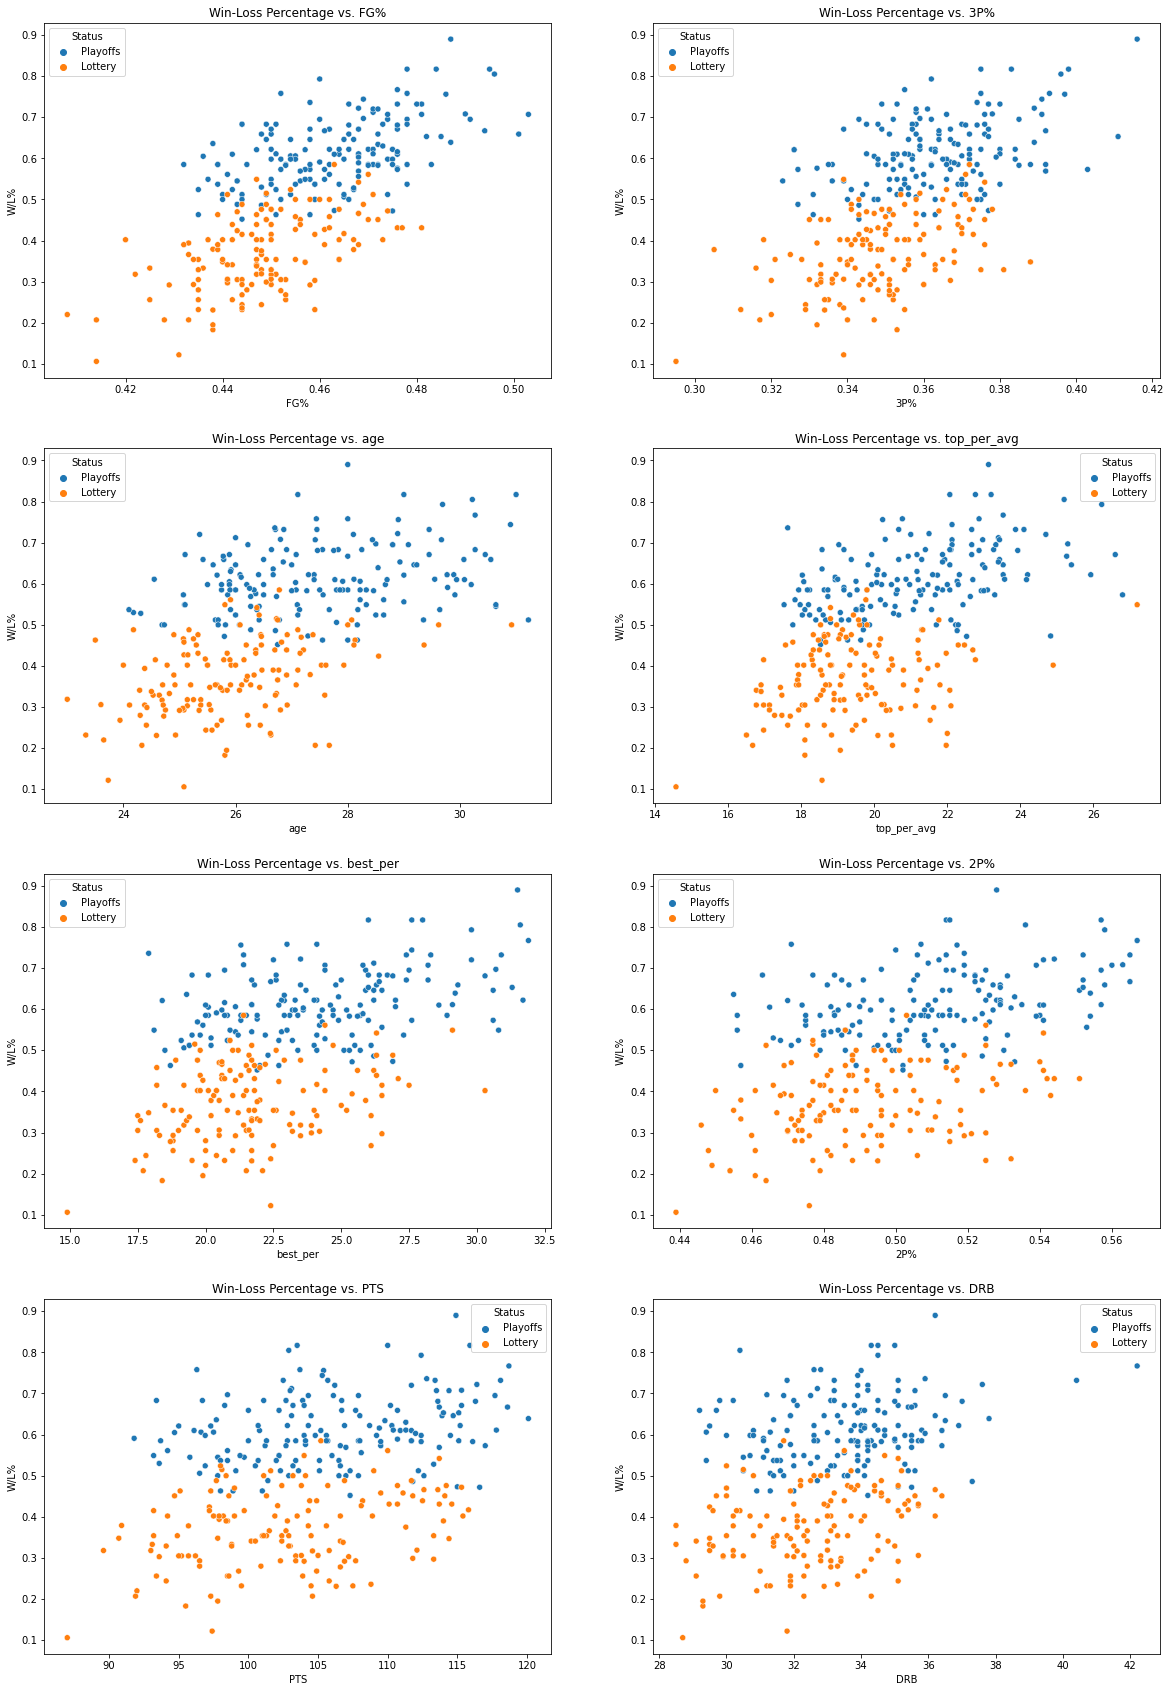

In [191]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

for i in range(4):
    for j in range(2):
        index = 2 * i + j
        sns.scatterplot(ax=axes[i, j], 
                        data=nba_data, 
                        x=corr_values.index[index], 
                        y='W/L%', 
                        hue='Status')
        axes[i, j].title.set_text(f"Win-Loss Percentage vs. {corr_values.index[index]}")

plt.show()

# Part 3

## Task 1: EDA and selecting the desired subset of the data 

First, we view the columns of the data.

In [130]:
nba_data.columns

Index(['Unnamed: 0', 'Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W/L%', 'Region', 'Year',
       '3P_Rate', 'TopTeamThisYear?', 'best_per', 'top_per_avg', 'age',
       'Year_Bin', 'Status'],
      dtype='object')

There are 27 different columns that can be plotted. In order to produce a meaningful pairplot for exploratory data analysis, we select the variables most correlated with win-loss ratio.

In [131]:
corr_gross = nba_data.corrwith(nba_data['W/L%'])
corr_gross.sort_values(ascending = False)

W/L%                1.000000
TopTeamThisYear?    0.736341
FG%                 0.643295
Unnamed: 0          0.593252
3P%                 0.559170
age                 0.556333
top_per_avg         0.528084
best_per            0.506642
2P%                 0.478336
PTS                 0.364253
DRB                 0.360060
FG                  0.347883
BLK                 0.309345
AST                 0.296048
TRB                 0.290052
3P                  0.233018
FT%                 0.199781
FT                  0.193864
STL                 0.180856
3P_Rate             0.163646
3PA                 0.138322
FTA                 0.116970
2P                  0.085043
MP                  0.054469
G                   0.043911
Year               -0.004086
FGA                -0.056216
ORB                -0.113787
PF                 -0.185701
2PA                -0.223344
TOV                -0.228249
Rk                 -0.594997
dtype: float64

We find that the 4 variables most correlated with W/L% are Field Goal Percentage, 3-Point Field Goal Percentage, 2-Point Field Goal Percentage, and Points; 'TopTeamThisYear?' is not an explanatory variable of interest as it is only used to identify teams within the top 25% win-loss ratio annually.

In [132]:
nba_data[['W/L%', 'FG%','3P%','2P%', 'PTS']].corr()

,W/L%,FG%,3P%,2P%,PTS
W/L%,1.000000,0.643295,0.559170,0.478336,0.364253
FG%,0.643295,1.000000,0.600355,0.807179,0.618376
3P%,0.559170,0.600355,1.000000,0.374939,0.395114
2P%,0.478336,0.807179,0.374939,1.000000,0.857804
PTS,0.364253,0.618376,0.395114,0.857804,1.000000


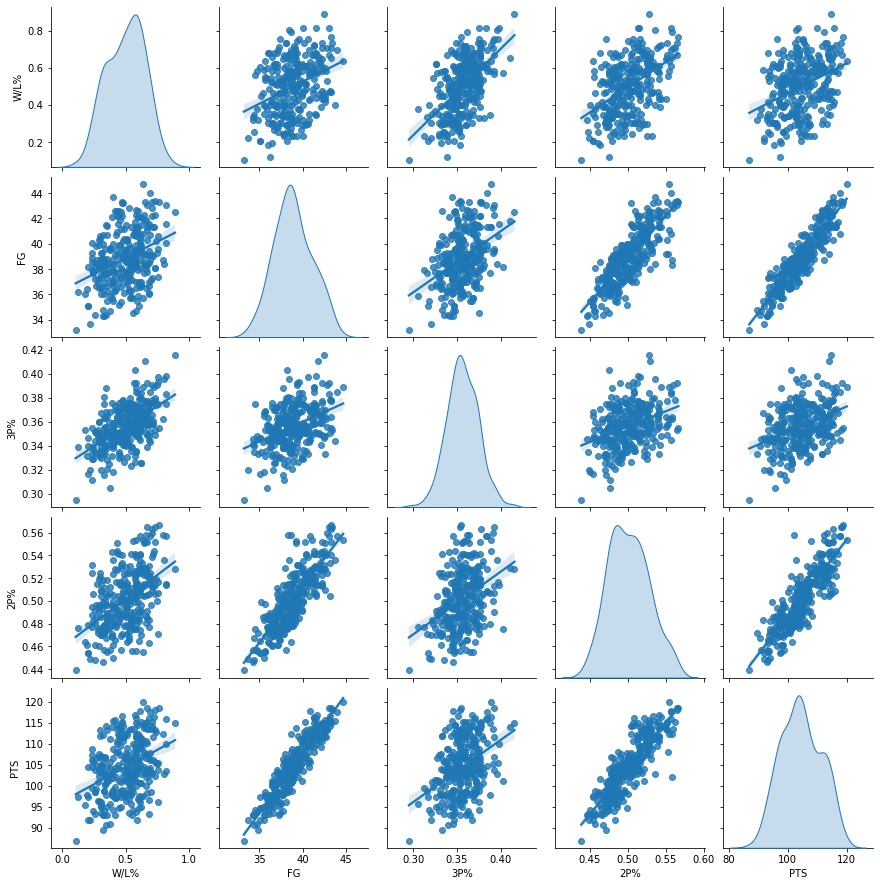

In [133]:
sns.pairplot(nba_data[['W/L%', 'FG','3P%','2P%','PTS']], kind = 'reg', diag_kind = 'kde')

There appears to be high multicollinearity (more/less than 0.5 or -0.5) between 'FG%' and the other 3 variables. Therefore we will be focusing on 'FG%', the variable most correlated with 'W/L%'.

From the pairplot, it appears that the data are normally distributed. As expected from the correlation grid, the explanatory variables are highly correlated with each other, some moreso than their correlation with 'W/L%'. This makes sense as 2-Point Field Goals and 3-Point Field Goals are simply categories of Field Goals, and Points are gained from Field Goals.

# Task 2: Hypothesis testing and validating trends

Is the mean field goal percentage significantly higher in the top 25% of teams by win percentage compared to the bottom 75% in 2021?

In [134]:
from scipy import stats
nba_data_top_wins_2021 = nba_data[(nba_data['TopTeamThisYear?'] == True) & (nba_data['Year'] == 2021)]
nba_data_bottom_wins_2021 = nba_data[(nba_data['TopTeamThisYear?'] == False) & (nba_data['Year'] == 2021)]
stats.ttest_ind(nba_data_top_wins_2021['FG%'], nba_data_bottom_wins_2021['FG%'])

Ttest_indResult(statistic=3.328065311813287, pvalue=0.0024574525484994535)

In [135]:
top_mean = nba_data_top_wins_2021['FG%'].mean()
bottom_mean = nba_data_bottom_wins_2021['FG%'].mean()
print("Mean FG% for teams in top 25% of W/L%:", top_mean)
print("Mean FG% for teams in bottom 75% of W/L%:", bottom_mean)
print("Difference in means:", top_mean - bottom_mean)

Mean FG% for teams in top 25% of W/L%: 0.4776999999999999
Mean FG% for teams in bottom 75% of W/L%: 0.4602500000000001
Difference in means: 0.0174499999999998


Yes, there appears to be a significant difference in the field goal percentage between the best teams and the rest of them. This implies that it is important to make one's shots count, not just getting the most points by shooting often.

Does this difference appear to hold between the top and bottom teams in the east and west annually?

Text(0.5, 1.02, 'Field Goal Percentage by Year and Win Percentage')

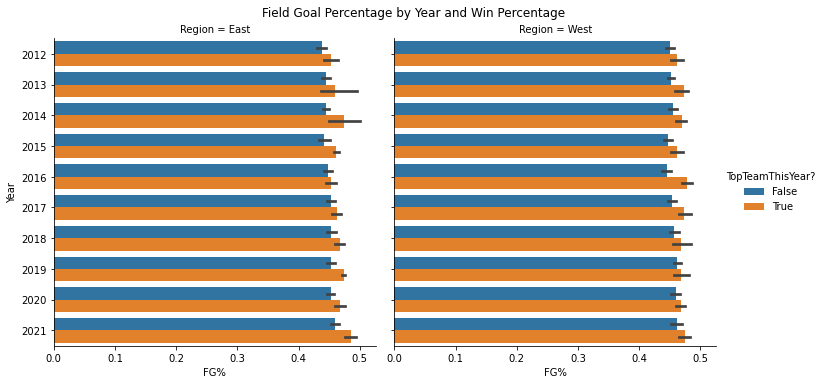

In [136]:
sns.catplot(x='FG%', y='Year', hue='TopTeamThisYear?', col='Region', data=nba_data, kind='bar', orient='h')
plt.suptitle('Field Goal Percentage by Year and Win Percentage', y=1.02)

Although the difference may seem insignificant at first, there is a consistent trend of a higher Field Goal Percentage for teams in the top 25% of Win/Loss Percentage, for each year and region; note that a significant difference was found in 2021 with a mean difference of about 1.7%.